In [24]:
pwd

'/disk1/RawData/wr85_hippo/apr262019'

In [1]:
%pylab inline
%gui qt

Populating the interactive namespace from numpy and matplotlib


In [2]:
from spiketag.mvc.Control import controller
from spiketag.base import probe

/disk0/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/disk0/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
mua_filename = './mua.bin'
spk_filename = './spk.bin'
prb_filename = '../prb_neuronexus_ff.json'

In [4]:
prb = probe()
prb.load(prb_filename)

In [5]:
from playground.base import logger
from spiketag.analysis import place_field

In [6]:
log = logger('./process.log', sync=True)
ts, pos= log.to_trajectory(session_id=0)

In [7]:
pc = place_field(pos=pos, ts=ts)

In [8]:
ctrl = controller(
                  probe = prb,
                  mua_filename=mua_filename, 
                  spk_filename=spk_filename, 
                  spktag_filename='./spktag/test',
                  binary_radix=13, 
                  scale=False,
                  pc=pc,
                  bin_size=4, v_cutoff=5,
                  time_segs=[[0,3700]]
                 )

2019-11-05 09:32:54,095 - spiketag - INFO - load spktag file
2019-11-05 09:32:57,383 - spiketag - INFO - load mua data for wave view
2019-11-05 09:32:57,659 - spiketag - INFO - #############  load data  ###################
2019-11-05 09:32:57,661 - spiketag - INFO - ./mua.bin loaded, it contains: 
2019-11-05 09:32:57,662 - spiketag - INFO - 92584977.0 * 160 points (59254385280 bytes) 
2019-11-05 09:32:57,663 - spiketag - INFO - 160 channels with sampling rate of 25000.0000 
2019-11-05 09:32:57,664 - spiketag - INFO - 3703.399 secs (61.723 mins) of data
2019-11-05 09:32:57,665 - spiketag - INFO - #############################################
2019-11-05 09:32:57,666 - spiketag - INFO - processing folder: ./
2019-11-05 09:32:57,755 - spiketag - INFO - raw data have 964307 spks
2019-11-05 09:32:57,756 - spiketag - INFO - ----------------success------------------
2019-11-05 09:32:57,757 - spiketag - INFO -  
2019-11-05 09:32:57,758 - spiketag - INFO - Model.spktag is generated, nspk:963482


In [9]:
ctrl.show()

2019-11-05 09:33:36,560 - spiketag - DEBUG - no more undo
2019-11-05 09:33:36,742 - spiketag - DEBUG - no more undo


In [17]:
ctrl.field_reorder(thres=.3)

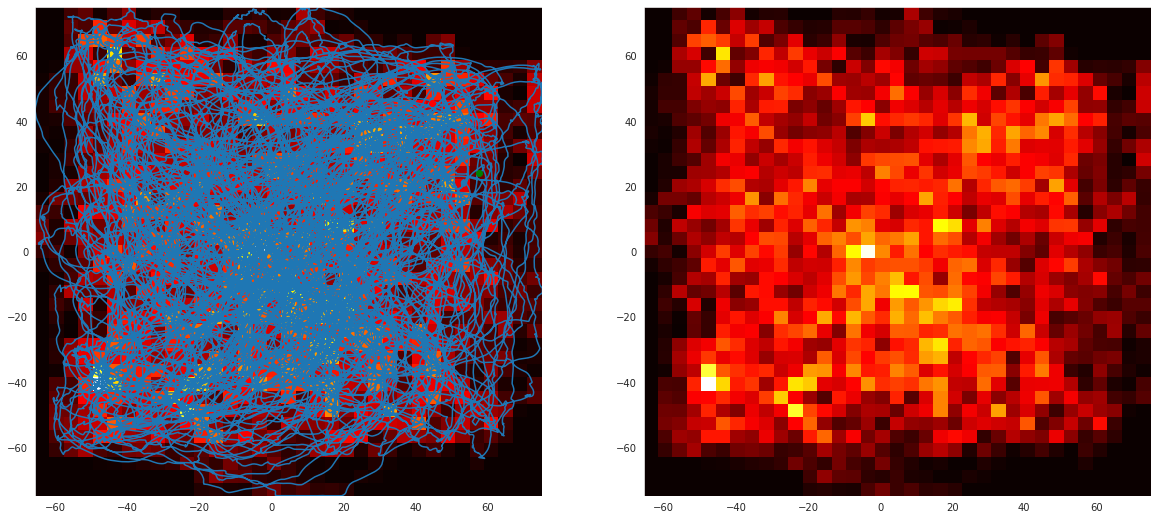

In [10]:
ctrl.model.pc.plot_occupation_map()

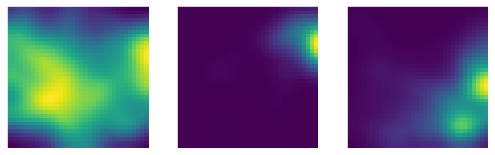

In [23]:
ctrl.model.pc.plot_fields(cmap='viridis', order=False);

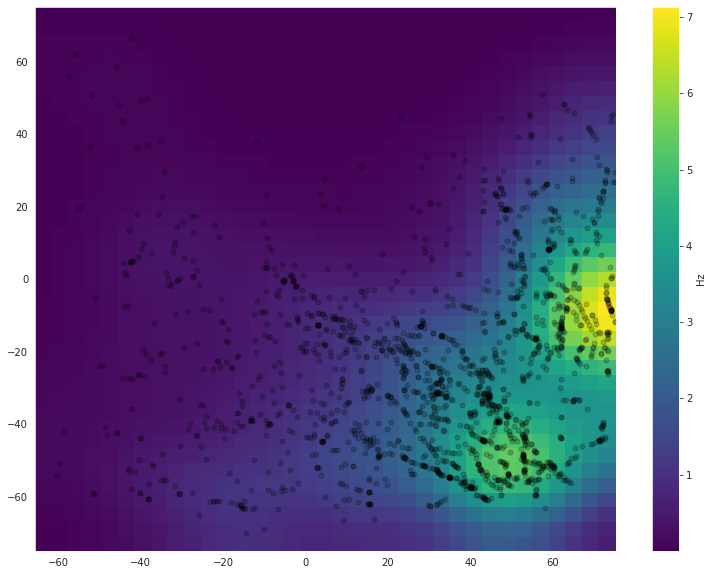

In [18]:
ctrl.model.pc.plot_field(alpha=.2, markercolor='k');

In [44]:
ctrl.save('./spktag/test')

delete (1,) spikes


In [24]:
ctrl.model.pc.kernlen=8

In [25]:
ctrl.model.pc.kernstd=1.5